
## Monte-calro-EM algorithm


$(x_1,x_2,x_3,x_4)$ are gathered from the multinomial dist

$M(n;0.5+0.25*\theta,0.25*(1-\theta),0.25*(1-\theta),0.25*\theta)$

estimation is easier if $x_1$ cell is split into two cells(z_1,z_2). so we create the augmented model.


In [107]:
### first generate samples

import numpy as np

theta = 0.3
n=20
size = 3
c = np.random.multinomial(n,[0.5+theta/4,0.25*(1-theta),0.25*(1-theta),0.25*theta],size)

print c[0]
x= c.sum(0)
print x

[8 6 5 1]
[28 17 10  5]


0.224784434688


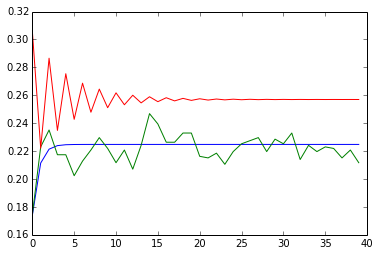

In [108]:
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
## initilize

####normal EM-algorithm
### initilize
theta = 0.05
theta_array1=[]
for i in range(0,40):
    ###E-step we find the p(Z|x_1,x_2,x_3,x_4,theta_old)
    z_2 = theta/(theta+2)*x[0]
    ###M=step
    theta = (z_2+x[3])/(z_2 + x[1]+x[2]+x[3])
    theta_array1.append(theta)

print theta
#### Monte-calro-EM algorithm
theta = 0.05
theta_array2=[]
for i in range(0,40):
    ###E-step we find the p(Z|x_1,x_2,x_3,x_4,theta_old)
    hey = theta/(theta+2)
    z_monte = np.random.binomial(x[0],hey,n).mean()
    ###M=step
    theta = (z_monte+x[3])/(z_monte + x[1]+x[2]+x[3])
    theta_array2.append(theta)
    
### Immportance-EM-algorithm
theta_old=0.27
hey2 = theta_old/(theta_old+2)
z_monte2= np.random.binomial(x[0],hey2,n)
###print z_monte2
impo1= [st.binom.pmf(i,n*size,hey2) for i in z_monte2]
#######
theta = 0.2
theta_array3=[]

for i in range(0,40):
    hey = theta/(theta+2)
    ### E-step we find the p(Z|x_1,x_2,x_3,x_4,theta_old)
    impo2= [st.binom.pmf(i,n*size,hey) for i in z_monte2]
    wegiht = np.array(impo2)/np.array(impo1)
    z_monte = (z_monte2*wegiht).mean()
    ###print z_monte
    ### M-step
    theta = (z_monte+x[3])/(z_monte + x[1]+x[2]+x[3])  
    theta_array3.append(theta)

plt.plot(theta_array1) ## normal-EM algorithm
plt.plot(theta_array2,color="green") ## monte-calro em-algorithm
plt.plot(theta_array3,color="red") ## importance-em-algorithm
plt.show()